In [1]:
#%matplotlib notebook
%matplotlib inline 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
nyu = pd.read_csv("/home/kevrodz/Documents/ADHD_200/NYU_phenotypic.csv", usecols=[1,2,3,4,5,8,9,10,12,13,15])
peking = pd.read_csv("/home/kevrodz/Documents/ADHD_200/Peking_1_phenotypic.csv", usecols=[1,2,3,4,5,8,9,10,12,13,15])
ni = pd.read_csv("/home/kevrodz/Documents/ADHD_200/NeuroIMAGE_phenotypic.csv", usecols=[1,2,3,4,5,8,9,10,12,13,15])

## Clean values off

In [3]:
ni = ni.drop(ni[(ni.Inattentive == -999)].index)
ni = ni[ni['Verbal IQ'] != -999]
ni = ni[ni['Handedness'] != -999]

In [4]:
peking = peking.drop(peking[(peking.Inattentive == -999)].index)
peking = peking[peking['Verbal IQ'] != -999]
peking = peking[peking['Handedness'] != -999]
peking = peking.dropna()

In [5]:
nyu = nyu.drop(nyu[(nyu.Inattentive == -999)].index)
nyu = nyu[nyu['Verbal IQ'] != -999]
nyu = nyu[nyu['Handedness'] != -999]
nyu = nyu.dropna()

# ADHD Measure and IQ Measure

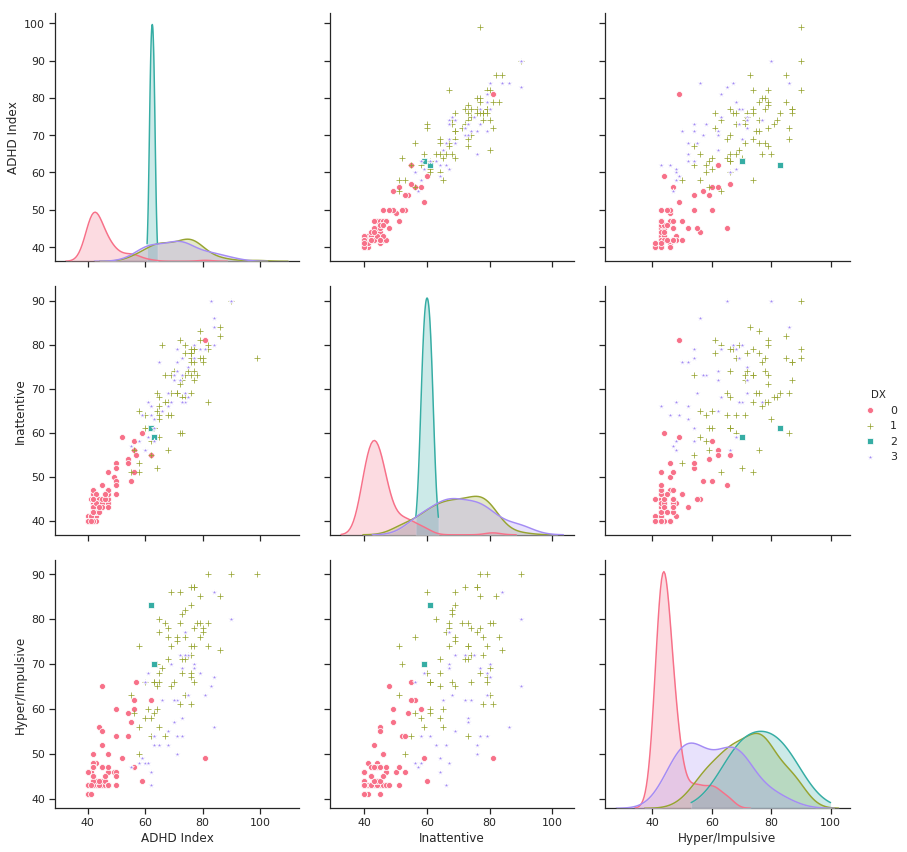

In [6]:
sns.set(style="ticks")
nyu_adhd_measure = sns.pairplot(nyu, palette='husl', size=4, vars=['ADHD Index', 'Inattentive', 'Hyper/Impulsive'], hue="DX", markers=['o','+','s', '*'])
nyu_adhd_measure.savefig('nyu_adhd_measure.png')

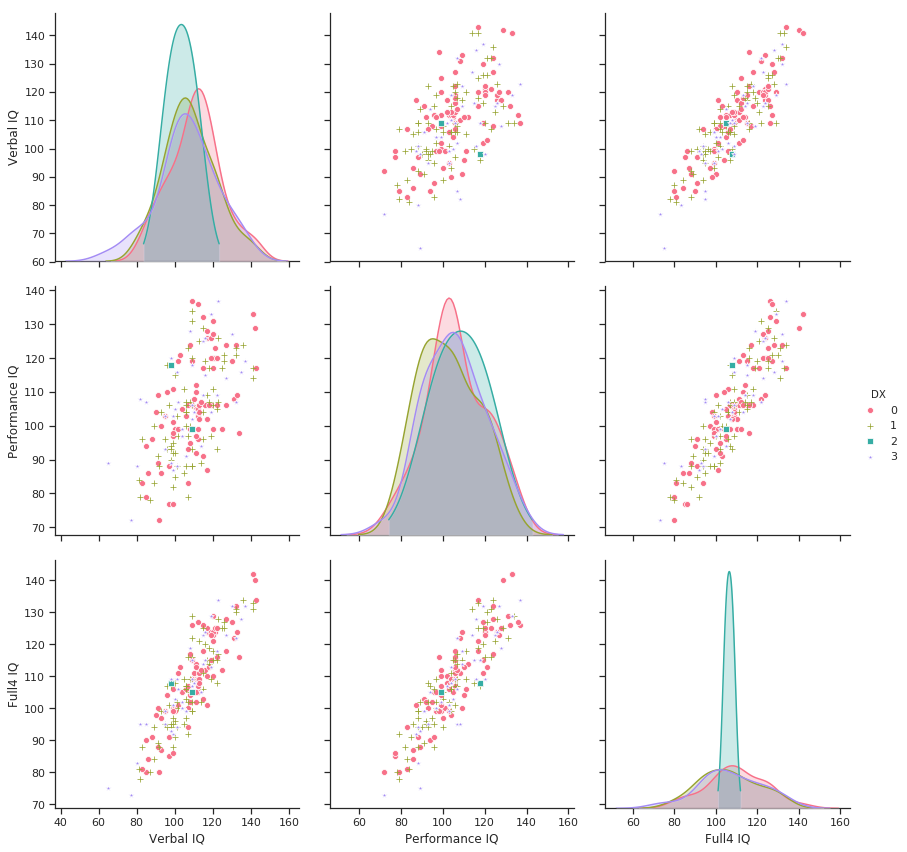

In [7]:
sns.set(style="ticks")
nyu_iq_measure = sns.pairplot(nyu, palette='husl', size=4, vars=['Verbal IQ', 'Performance IQ', 'Full4 IQ'], hue="DX", markers=['o','+','s', '*'])
nyu_iq_measure.savefig('nyu_iq_measure.png')

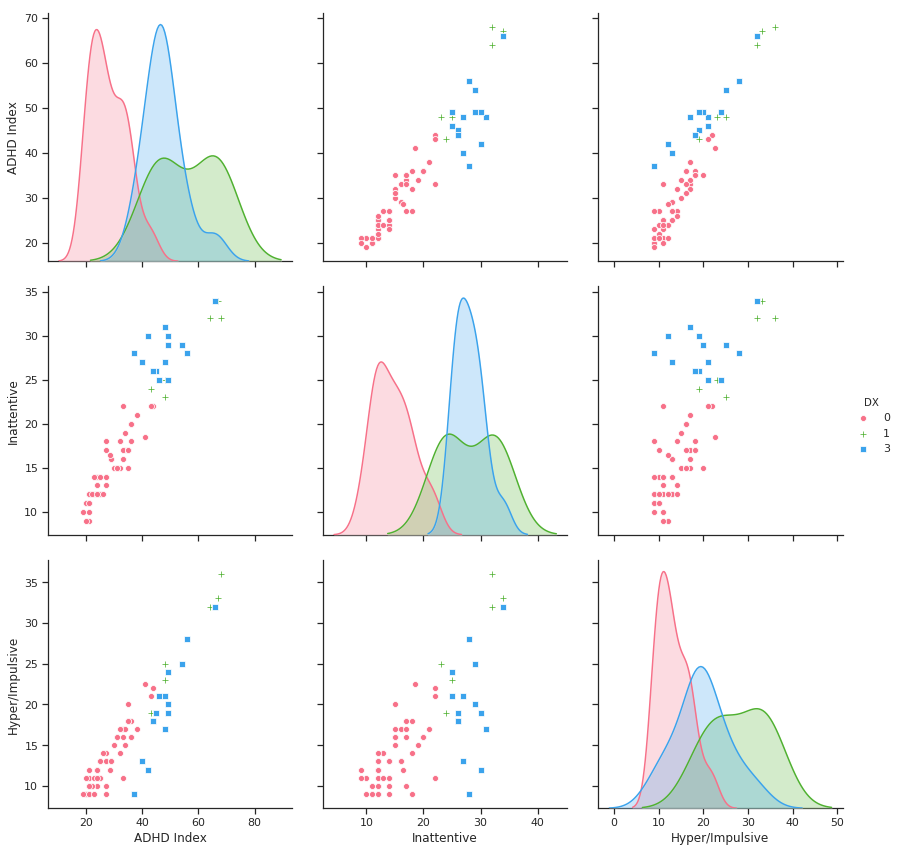

In [8]:
peking_adhd_measure = sns.pairplot(peking, palette='husl',size=4,vars=['ADHD Index', 'Inattentive', 'Hyper/Impulsive'], hue="DX", markers=['o','+','s'])
peking_adhd_measure.savefig('peking_adhd_measure.png')

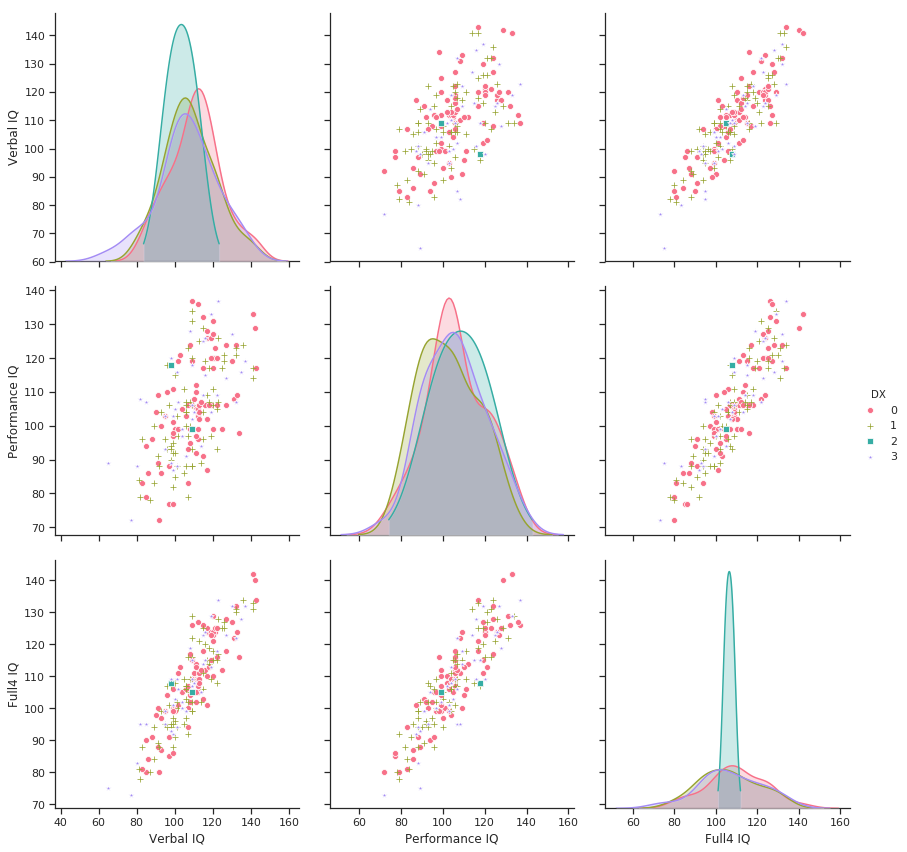

In [9]:
sns.set(style="ticks")
peking_iq_measure = sns.pairplot(nyu, palette='husl', size=4, vars=['Verbal IQ', 'Performance IQ', 'Full4 IQ'], hue="DX", markers=['o','+','s', '*'])
peking_iq_measure.savefig('peking_iq_measure.png')

# MEAN AND STD 

## Age and Gender by Dx

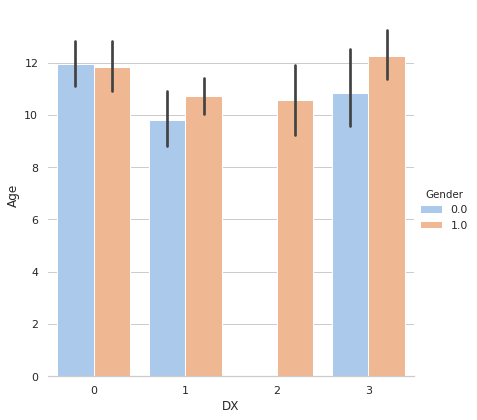

In [10]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="DX", y="Age", hue="Gender", data=nyu,
                height=6, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Age")

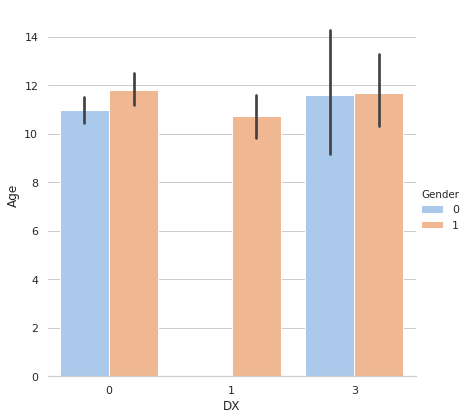

In [11]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="DX", y="Age", hue="Gender", data=peking,
                height=6, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Age")

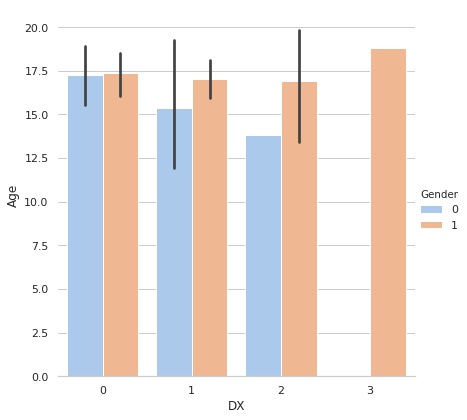

In [12]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="DX", y="Age", hue="Gender", data=ni,
                height=6, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Age")

## Mean and STD to all

In [13]:
nyu.groupby(['DX','Gender']).agg(["mean", "std"])

Site             Age           Handedness           ADHD Index  \
          mean  std       mean       std       mean       std       mean   
DX Gender                                                                  
0  0.0       5  0.0  11.954565  3.069869   0.567174  0.269061  45.565217   
   1.0       5  0.0  11.835750  3.180041   0.614500  0.285234  45.350000   
1  0.0       5  0.0   9.819091  1.869361   0.521818  0.245838  80.909091   
   1.0       5  0.0  10.724483  2.571347   0.658448  0.278982  69.551724   
2  1.0       5  0.0  10.570000  1.909188   0.555000  0.176777  62.500000   
3  0.0       5  0.0  10.846364  2.628647   0.534545  0.231014  77.454545   
   1.0       5  0.0  12.256897  2.774177   0.760690  0.194494  68.344828   

                    Inattentive            Hyper/Impulsive             \
                std        mean        std            mean        std   
DX Gender                                                               
0  0.0     4.796537   45.869565   4.791700       47.521739   6.414356   
   1.0     7.604149   45.050000   7.355270       45.450000   4.618525   
1  0.0     9.364342   75.909091   9.648363       78.636364   9.942562   
   1.0     7.024200   68.534483   8.438042       70.758621   9.502189   
2  1.0     0.707107   60.000000   1.414214       76.500000   9.192388   
3  0.0     9.574588   76.909091  10.367782       67.181818  12.131102   
   1.0     7.422340   69.068966   8.404637       58.655172   9.320775   

            Verbal IQ            Performance IQ               Full4 IQ  \
                 mean        std           mean        std        mean   
DX Gender                                                                
0  0.0     110.021739  13.357460     103.956522  13.829046  107.934783   
   1.0     112.150000  13.945958     109.575000  15.238089  112.200000   
1  0.0     109.636364  13.872799     101.272727  16.383473  107.181818   
   1.0     107.844828  13.482675     103.379310  13.919351  106.465517   
2  1.0     103.500000   7.778175     108.500000  13.435029  106.500000   
3  0.0     101.090909  14.583926     106.181818  12.820438  104.000000   
   1.0     108.965517  15.812479     105.724138  15.345768  108.517241   

                      
                 std  
DX Gender             
0  0.0     13.607844  
   1.0     14.560572  
1  0.0     15.753210  
   1.0     13.836407  
2  1.0      2.121320  
3  0.0     12.585706  
   1.0     15.681246

In [14]:
peking.groupby(['DX','Gender']).agg(["mean", "std"])

Site             Age           Handedness           ADHD Index  \
          mean  std       mean       std       mean       std       mean   
DX Gender                                                                  
0  0         1  0.0  10.964324  1.717834   1.000000  0.000000  27.756757   
   1         1  0.0  11.811333  1.404050   0.933333  0.258199  29.166667   
1  1         1  0.0  10.735000  1.257120   1.000000  0.000000  56.333333   
3  0         1  0.0  11.605000  3.209367   1.000000  0.000000  52.750000   
   1         1  0.0  11.680909  2.617443   1.000000  0.000000  46.000000   

                     Inattentive           Hyper/Impulsive            \
                 std        mean       std            mean       std   
DX Gender                                                              
0  0        6.722290   14.513514  3.640983       13.243243  3.600968   
   1        5.712351   15.333333  2.986079       13.833333  3.768605   
1  1       11.183321   28.333333  4.844241       28.000000  6.633250   
3  0       10.996211   29.500000  3.109126       23.250000  8.460693   
   1        4.427189   27.545455  2.161649       18.454545  4.698162   

            Verbal IQ            Performance IQ               Full4 IQ  \
                 mean        std           mean        std        mean   
DX Gender                                                                
0  0       116.837838  13.307294     112.513514  14.102052  116.459459   
   1       124.333333  11.914377     114.400000  16.923357  122.066667   
1  1       100.500000  17.026450     101.333333   9.114092  100.833333   
3  0       101.750000  19.872510      91.750000  12.284814   97.000000   
   1       101.000000  12.680694      90.272727  14.636194   95.545455   

                      
                 std  
DX Gender             
0  0       13.063083  
   1       13.997279  
1  1       11.016654  
3  0       18.743888  
   1        9.842394

In [15]:
ni.dropna(axis='columns').groupby(['DX','Gender']).agg(["mean", "std"])

Site             Age           Handedness          
          mean  std       mean       std       mean       std
DX Gender                                                    
0  0         4  0.0  17.280000  2.928614   0.916667  0.288675
   1         4  0.0  17.378182  2.267134   0.909091  0.301511
1  0         4  0.0  15.385000  4.040862   1.000000  0.000000
   1         4  0.0  17.037143  2.190014   0.857143  0.363137
2  0         4  NaN  13.810000       NaN   1.000000       NaN
   1         4  0.0  16.900000  4.176578   1.200000  1.095445
3  1         4  NaN  18.800000       NaN   1.000000       NaN

## Boxplot

In [16]:
nyu_melted = pd.melt(nyu, id_vars=['Gender','Age', 'DX', 'Handedness', 'Site'], 
             var_name="Measure", value_name="Score")

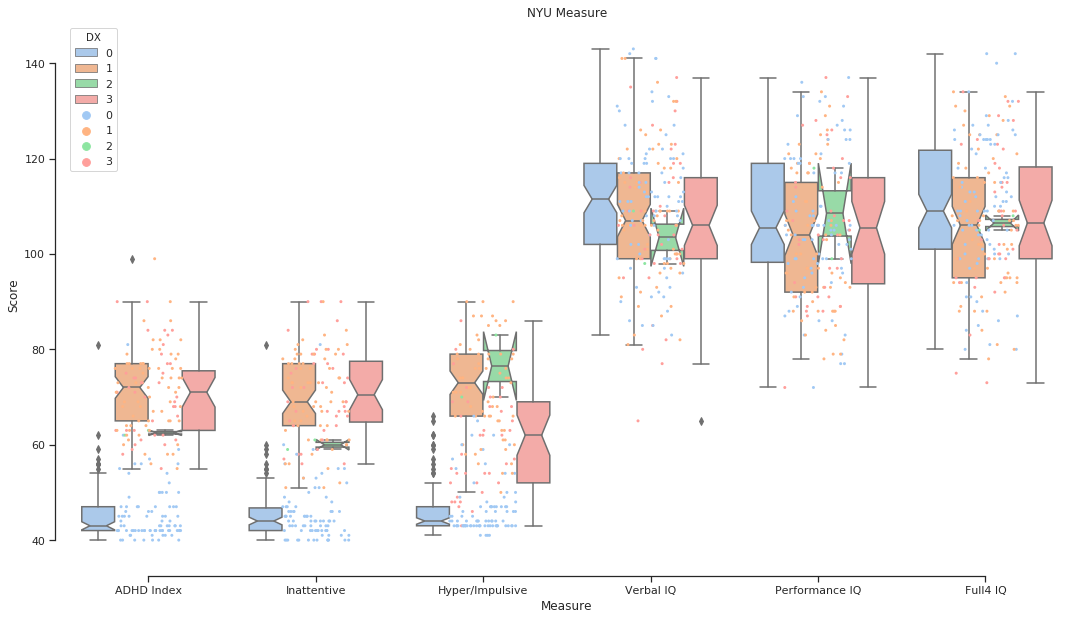

In [17]:
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(18, 10))
nyu_measure = sns.boxplot(x='Measure', y='Score', hue="DX", data=nyu_melted, notch=True)
nyu_measure = sns.stripplot(x='Measure', y='Score', hue="DX", data=nyu_melted, jitter=0.2, size=3)
sns.despine(offset=10, trim=True)
plt.title("NYU Measure")
nyu_measure.get_figure().savefig('nyu_measure.png')

In [18]:
peking_melted = pd.melt(peking, id_vars=['Gender','Age', 'DX', 'Handedness', 'Site'], 
             var_name="Measure", value_name="Score")

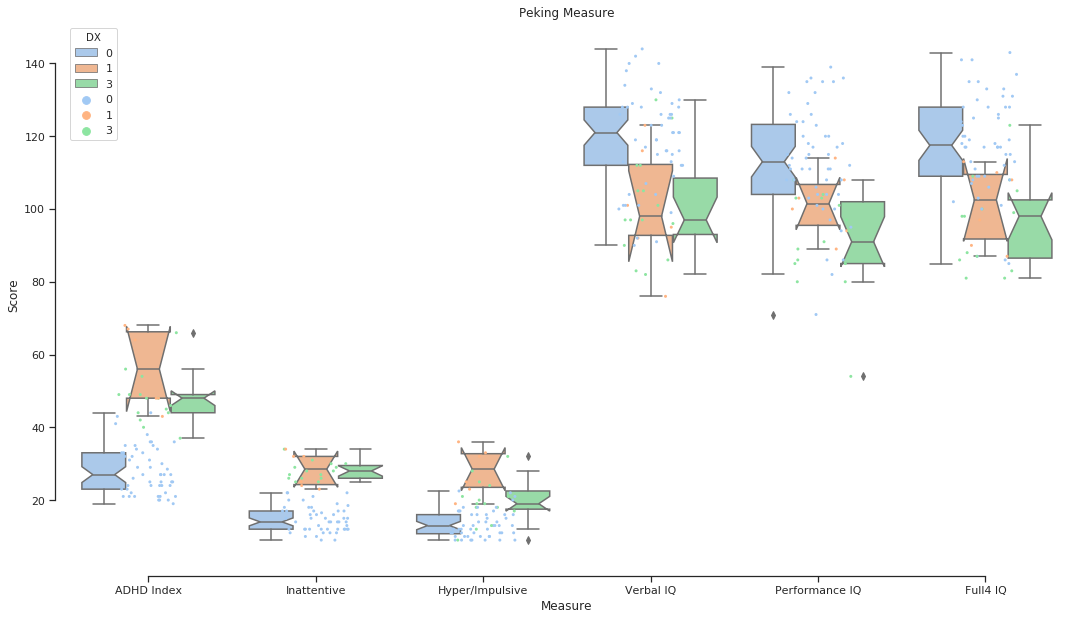

In [19]:
sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(18, 10))
peking_measure = sns.boxplot(x='Measure', y='Score', hue="DX", data=peking_melted, notch=True)
peking_measure = sns.stripplot(x='Measure', y='Score', hue="DX", data=peking_melted, jitter=0.2, size=3)
sns.despine(offset=10, trim=True)
plt.title("Peking Measure")
peking_measure.get_figure().savefig('peking_measure.png')

# Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

## Chi^2 all Dx NYU

In [21]:
nyu = nyu[['Site', 'Handedness','Gender','Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'DX']]
nyu_array = nyu.values
nyu_X = nyu_array[:,2:10] # Not handedness bcause it has negatives values (3)
nyu_Y = nyu_array[:,10]
#nyu_X.astype('float64')
#nyu_Y.astype('float64')

In [22]:
print("Feature selection by all Dx")
# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(nyu_X, nyu_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(nyu_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by all Dx
[  9.027   6.826 531.119 498.303 438.691   5.99    4.951   4.392]
[[ 1. 40. 41. 41.]
 [ 1. 60. 56. 48.]
 [ 0. 86. 82. 85.]
 [ 0. 42. 43. 44.]
 [ 1. 64. 52. 70.]]


Se encuentran los puntajes de cada atributo y los 4 atributos elegidos (aquellos con los puntajes más altos): ADHD Index, Innattentive, Hyper/Impulsive, Age. Estos puntajes ayudarán a determinar las mejores características para entrenar el modelo.
Pd: La primera fila denota los nombres de las características.

## Chi^2 binary Dx NYU

In [23]:
print("Feature selection by binary Dx")
nyu_bin = nyu.copy()
nyu_bin.loc[nyu_bin['DX'] > 0, 'DX'] = 1 #Make Dx binary, only 2 diagnostics
nyu_array = nyu_bin.values
nyu_bin_X = nyu_array[:,2:10] # Not handedness bcause it has negatives values (3)
nyu_bin_Y = nyu_array[:,10]

# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(nyu_bin_X, nyu_bin_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(nyu_bin_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by binary Dx
[  8.388   3.102 528.54  493.836 383.935   5.27    2.69    4.276]
[[ 1. 40. 41. 41.]
 [ 1. 60. 56. 48.]
 [ 0. 86. 82. 85.]
 [ 0. 42. 43. 44.]
 [ 1. 64. 52. 70.]]


Se encuentran los puntajes de cada atributo y los 4 atributos elegidos (aquellos con los puntajes más altos): ADHD Index, Innattentive, Hyper/Impulsive, Verbal IQ. Estos puntajes ayudarán a determinar las mejores características para entrenar el modelo.

## RFE all Dx NYU

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by all Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(nyu_X, nyu_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by all Dx
Num Features: 4
Selected Features: [ True False False False False  True  True  True]
Feature Ranking: [1 4 2 5 3 1 1 1]


La Eliminación de características recursivas (o RFE) funciona eliminando atributos recursivamente y construyendo un modelo sobre aquellos atributos que permanecen. Utiliza la precisión del modelo para identificar qué atributos (y la combinación de atributos) contribuyen más a la predicción del atributo objetivo.
Para la cual elimina Gender, Full4 IQ, Performance IQ, Verbal IQ
Dejando Innattentive, Age, Hyper/Impulsive, ADHD Index.
Con probabilidad de clases máx 10*10-3 de predicción

## RFE binary Dx NYU

In [26]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by binary Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(nyu_bin_X, nyu_bin_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by binary Dx
Num Features: 4
Selected Features: [ True False False False False  True  True  True]
Feature Ranking: [1 3 2 4 5 1 1 1]


Para la cual elimina Gender, Full4 IQ, Performance IQ, Verbal IQ.
Dejando Hyper/Impulsive, Innattentive, Age, ADHD Index

## Ridge regression all Dx NYU

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge = Ridge(alpha=1.0)
ridge.fit(nyu_X, nyu_Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [30]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.244 * X0 + 0.023 * X1 + 0.055 * X2 + 0.024 * X3 + -0.035 * X4 + 0.019 * X5 + 0.021 * X6 + -0.036 * X7


Puede ubicar todos los términos de coeficiente agregados con las variables de características. L2-Regularización,  Para las características correlacionadas, significa que tienden a obtener coeficientes similares. Las características que tienen coeficientes negativos no contribuyen mucho.
Determina entonces para una toma de decisiones de selección de caracteristicas.
Caracteristicas con mejor fitness, ADHD Index, Inattentive, Age, Verbal IQ

## Ridge regression binary Dx NYU

In [31]:
ridge.fit(nyu_bin_X, nyu_bin_Y)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.213 * X0 + -0.004 * X1 + 0.017 * X2 + 0.007 * X3 + 0.005 * X4 + -0.011 * X5 + -0.011 * X6 + 0.021 * X7


Caracteristicas con mejor fitness, Full4 IQ, ADHD Index, Inattentive, Hyper/Impulsive

## Feature Importance all Dx NYU

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

In [33]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(nyu_X, nyu_Y)
print(model.feature_importances_)

[0.043 0.077 0.211 0.203 0.295 0.062 0.05  0.06 ]


Los árboles de decisión embolsados como Random Forest y Extra Trees se pueden usar para estimar la importancia de las características.
Importancia: ADHD Index, Hyper/Impulsive, Inattentive

## Feature Importance binary Dx NYU

In [34]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(nyu_bin_X, nyu_bin_Y)
print(model.feature_importances_)

[0.096 0.023 0.238 0.334 0.233 0.039 0.014 0.023]


Importancia: ADHD Index, Inattentive, Hyper/Impulsive

## Genetic Algorithm binary Dx NYU

In [41]:
# By: Keveen Rodriguez Zapata
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import f1_score

class FitenessFunction:
    
    def __init__(self,n_splits = 5,*args,**kwargs):
        """
            Parameters
            -----------
            n_splits :int, 
                Number of splits for cv
            
            verbose: 0 or 1
        """
        self.n_splits = n_splits
    

    def calculate_fitness(self,model,x,y):
        cv_set = np.repeat(-1.,x.shape[0])
        skf = StratifiedKFold(n_splits = self.n_splits)
        for train_index,test_index in skf.split(x,y):
            x_train,x_test = x[train_index],x[test_index]
            y_train,y_test = y[train_index],y[test_index]
            if x_train.shape[0] != y_train.shape[0]:
                raise Exception()
            model.fit(x_train,y_train)
            predicted_y = model.predict(x_test)
            cv_set[test_index] = predicted_y
        return f1_score(y,cv_set)

In [42]:
# By: Keveen Rodriguez Zapata
from deap import base, creator
import random
import numpy as np
from deap import tools
import fitness_function as ff


class FeatureSelectionGA:
    """
        FeaturesSelectionGA
        This class uses Genetic Algorithm to find out the best features for an input model
        using Distributed Evolutionary Algorithms in Python(DEAP) package. Default toolbox is
        used for GA but it can be changed accordingly.
    
    """
    def __init__(self,model,x,y,cv_split=5,verbose=0):
        """
            Parameters
            -----------
            model : scikit-learn supported model, 
                x :  {array-like}, shape = [n_samples, n_features]
                     Training vectors, where n_samples is the number of samples 
                     and n_features is the number of features.
 
                y  : {array-like}, shape = [n_samples]
                     Target Values
            cv_split: int
                     Number of splits for cross_validation to calculate fitness.
            
            verbose: 0 or 1
        """
        self.model =  model
        self.n_features = x.shape[1]
        self.toolbox = None
        self.creator = self._create()
        self.cv_split = cv_split
        self.x = x
        self.y = y
        self.verbose = verbose
        if self.verbose==1:
            print("Model {} will select best features among {} features using cv_split :{}.".format(model,x.shape[1],cv_split))
            print("Shape od train_x: {} and target: {}".format(x.shape,y.shape))
        self.final_fitness = []
        self.fitness_in_generation = {}
        self.best_ind = None
    
    def evaluate(self,individual):
        fit_obj = ff.FitenessFunction(self.cv_split)
        np_ind = np.asarray(individual)
        if np.sum(np_ind) == 0:
            fitness = 0.0
        else:
            feature_idx = np.where(np_ind==1)[0]
            fitness = fit_obj.calculate_fitness(self.model,self.x[:,feature_idx],self.y)
        
        if self.verbose == 1:
            print("Individual: {}  Fitness_score: {} ".format(individual,fitness))
            
        return fitness,
    
    
    def _create(self):
        creator.create("FeatureSelect", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FeatureSelect)
        return creator
    
    def create_toolbox(self):
        """ 
            Custom creation of toolbox.
            Parameters
            -----------
                self
            Returns
            --------
                Initialized toolbox
        """
        
        self._init_toolbox()
        return toolbox
        
    def register_toolbox(self,toolbox):
        """ 
            Register custom created toolbox. Evalute function will be registerd
            in this method.
            Parameters
            -----------
                Registered toolbox with crossover,mutate,select tools except evaluate
            Returns
            --------
                self
        """
        toolbox.register("evaluate", self.evaluate)
        self.toolbox = toolbox
     
    
    def _init_toolbox(self):
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", random.randint, 0, 1)
        # Structure initializers
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, self.n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        return toolbox
        
        
    def _default_toolbox(self):
        toolbox = self._init_toolbox()
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        toolbox.register("evaluate", self.evaluate)
        return toolbox
    
    def get_final_scores(self,pop,fits):
        self.final_fitness = list(zip(pop,fits))
        
    
        
    def generate(self,n_pop,cxpb = 0.5,mutxpb = 0.2,ngen=5,set_toolbox = False):
        
        """ 
            Generate evolved population
            Parameters
            -----------
                n_pop : {int}
                        population size
                cxpb  : {float}
                        crossover probablity
                mutxpb: {float}
                        mutation probablity
                n_gen : {int}
                        number of generations
                set_toolbox : {boolean}
                              If True then you have to create custom toolbox before calling 
                              method. If False use default toolbox.
            Returns
            --------
                Fittest population
        """
        
        
        
        if self.verbose==1:
            print("Population: {}, crossover_probablity: {}, mutation_probablity: {}, total generations: {}".format(n_pop,cxpb,mutxpb,ngen))
        
        if not set_toolbox:
            self.toolbox = self._default_toolbox()
        else:
            raise Exception("Please create a toolbox.Use create_toolbox to create and register_toolbox to register. Else set set_toolbox = False to use defualt toolbox")
        pop = self.toolbox.population(n_pop)
        CXPB, MUTPB, NGEN = cxpb,mutxpb,ngen

        # Evaluate the entire population
        print("EVOLVING.......")
        fitnesses = list(map(self.toolbox.evaluate, pop))
        
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

        for g in range(NGEN):
            print("-- GENERATION {} --".format(g+1))
            offspring = self.toolbox.select(pop, len(pop))
            self.fitness_in_generation[str(g+1)] = max([ind.fitness.values[0] for ind in pop])
            # Clone the selected individuals
            offspring = list(map(self.toolbox.clone, offspring))

            # Apply crossover and mutation on the offspring
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < CXPB:
                    self.toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < MUTPB:
                    self.toolbox.mutate(mutant)
                    del mutant.fitness.values

            # Evaluate the individuals with an invalid fitness
            weak_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = list(map(self.toolbox.evaluate, weak_ind))
            for ind, fit in zip(weak_ind, fitnesses):
                ind.fitness.values = fit
            print("Evaluated %i individuals" % len(weak_ind))

            # The population is entirely replaced by the offspring
            pop[:] = offspring
            
                    # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        if self.verbose==1:
            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
        print("-- Only the fittest survives --")

        self.best_ind = tools.selBest(pop, 1)[0]
        print("Best individual is %s, %s" % (self.best_ind, self.best_ind.fitness.values))
        self.get_final_scores(pop,fits)
        
        return pop

In [43]:
import warnings; warnings.simplefilter('ignore')
model = LogisticRegression()
fsga = FeatureSelectionGA(model, nyu_bin_X, nyu_bin_Y, verbose=1)
pop = fsga.generate(100)

Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) will select best features among 8 features using cv_split :5.
Shape od train_x: (197, 8) and target: (197,)
Population: 100, crossover_probablity: 0.5, mutation_probablity: 0.2, total generations: 5
EVOLVING.......
Individual: [1, 1, 0, 1, 0, 0, 1, 1]  Fitness_score: 0.918918918918919 
Individual: [1, 1, 0, 1, 0, 0, 1, 0]  Fitness_score: 0.9272727272727272 
Individual: [1, 1, 1, 0, 1, 1, 0, 1]  Fitness_score: 0.9279279279279279 
Individual: [1, 1, 0, 0, 0, 1, 0, 1]  Fitness_score: 0.7416666666666667 
Individual: [0, 1, 0, 1, 0, 0, 0, 1]  Fitness_score: 0.9107142857142857 
Individual: [1, 1, 1, 0, 0, 0, 0, 0]  Fitness_score: 0.9230769230769231 
Individual: [1, 0, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.918918918918919 
Indivi

Individual: [0, 0, 0, 1, 1, 1, 1, 0]  Fitness_score: 0.8849557522123894 
Individual: [1, 0, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.918918918918919 
Individual: [1, 0, 1, 0, 0, 0, 1, 1]  Fitness_score: 0.9244444444444444 
Individual: [0, 1, 1, 0, 0, 0, 0, 0]  Fitness_score: 0.9155555555555556 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.9285714285714286 
Individual: [1, 1, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.9327354260089685 
Individual: [1, 1, 1, 0, 0, 0, 0, 1]  Fitness_score: 0.9375 
Individual: [1, 0, 1, 0, 0, 0, 0, 1]  Fitness_score: 0.9292035398230089 
Individual: [1, 1, 1, 0, 1, 1, 1, 1]  Fitness_score: 0.968609865470852 
Individual: [1, 0, 1, 0, 0, 0, 1, 1]  Fitness_score: 0.9244444444444444 
Individual: [1, 0, 0, 0, 1, 1, 1, 0]  Fitness_score: 0.8968609865470852 
Individual: [0, 0, 1, 0, 1, 0, 0, 0]  Fitness_score: 0.9519650655021833 
Individual: [0, 0, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.9155555555555556 
Individual: [0, 0, 1, 0, 1, 0, 0, 0]  Fitness_score: 0.9519650655

Individual: [0, 0, 1, 0, 1, 0, 1, 1]  Fitness_score: 0.9122807017543859 
Individual: [0, 1, 1, 1, 0, 1, 0, 0]  Fitness_score: 0.9099099099099099 
Individual: [0, 1, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.914798206278027 
Individual: [1, 1, 1, 1, 0, 0, 1, 0]  Fitness_score: 0.9321266968325792 
Individual: [1, 0, 1, 1, 0, 0, 1, 0]  Fitness_score: 0.9333333333333332 
Individual: [0, 0, 1, 1, 0, 1, 1, 1]  Fitness_score: 0.9596412556053813 
Individual: [1, 0, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.9292035398230089 
Individual: [1, 1, 1, 1, 1, 1, 1, 1]  Fitness_score: 0.968609865470852 
Individual: [1, 1, 1, 0, 0, 0, 1, 1]  Fitness_score: 0.9279279279279279 
Individual: [0, 0, 1, 1, 0, 1, 0, 0]  Fitness_score: 0.9285714285714286 
Individual: [1, 1, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.9327354260089685 
Individual: [1, 1, 1, 1, 0, 0, 0, 0]  Fitness_score: 0.9230769230769231 
Individual: [1, 0, 1, 1, 0, 0, 1, 0]  Fitness_score: 0.9333333333333332 
Individual: [1, 1, 1, 0, 1, 0, 1, 0]  Fitness_score: 

Individual: [0, 0, 1, 0, 0, 1, 1, 1]  Fitness_score: 0.9642857142857144 
Individual: [0, 0, 1, 0, 0, 1, 1, 1]  Fitness_score: 0.9642857142857144 
Individual: [1, 0, 0, 0, 0, 0, 0, 0]  Fitness_score: 0.7416666666666667 
Individual: [0, 0, 1, 0, 0, 1, 1, 1]  Fitness_score: 0.9642857142857144 
Individual: [0, 0, 1, 0, 1, 1, 1, 1]  Fitness_score: 0.9599999999999999 
Individual: [1, 1, 1, 1, 1, 1, 1, 1]  Fitness_score: 0.968609865470852 
Individual: [1, 0, 1, 1, 0, 1, 0, 0]  Fitness_score: 0.9196428571428571 
Individual: [1, 1, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.9279279279279279 
Individual: [0, 0, 1, 1, 1, 1, 1, 1]  Fitness_score: 0.9599999999999999 
Individual: [1, 1, 1, 1, 0, 0, 1, 1]  Fitness_score: 0.9279279279279279 
Individual: [0, 0, 1, 1, 0, 1, 1, 1]  Fitness_score: 0.9596412556053813 
Individual: [1, 0, 1, 0, 0, 1, 1, 1]  Fitness_score: 0.963963963963964 
Individual: [1, 1, 1, 0, 1, 1, 1, 1]  Fitness_score: 0.968609865470852 
Individual: [1, 1, 1, 0, 1, 1, 1, 1]  Fitness_score: 0

El algoritmo genético seleccionó Age, ADHD Index, Inattentive

## Chi^2 all Dx Peking

In [44]:
peking = peking[['Site', 'Handedness','Gender','Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'DX']]
peking_array = peking.values
peking_X = peking_array[:,2:10] # Not handedness bcause it has negatives values (3)
peking_Y = peking_array[:,10]

In [45]:
print("Feature selection by all Dx")
# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(peking_X, peking_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(peking_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by all Dx
[  9.96    0.373 220.243 144.251  89.27   42.6    56.606  58.333]
[[ 30.  15.  15. 135.]
 [ 20.  11.   9. 133.]
 [ 64.  32.  32. 113.]
 [ 32.  18.  14.  87.]
 [ 48.  31.  17. 109.]]


## Chi^2 binary Dx Peking

In [46]:
print("Feature selection by binary Dx")
peking_bin = peking.copy()
peking_bin.loc[peking_bin['DX'] > 0, 'DX'] = 1 #Make Dx binary, only 2 diagnostics
peking_array = peking_bin.values
peking_bin_X = peking_array[:,2:10] # Not handedness bcause it has negatives values (3)
peking_bin_Y = peking_array[:,10]

# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(peking_bin_X, peking_bin_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(peking_bin_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by binary Dx
[9.265e+00 4.671e-02 2.112e+02 1.442e+02 7.086e+01 4.258e+01 5.207e+01
 5.741e+01]
[[ 30.  15.  15. 135.]
 [ 20.  11.   9. 133.]
 [ 64.  32.  32. 113.]
 [ 32.  18.  14.  87.]
 [ 48.  31.  17. 109.]]


## RFE all Dx Peking

In [47]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by all Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(peking_X, peking_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by all Dx
Num Features: 4
Selected Features: [ True False  True  True  True False False False]
Feature Ranking: [1 3 1 1 1 5 4 2]


## RFE binary Dx Peking


In [48]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by binary Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(peking_bin_X, peking_bin_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by binary Dx
Num Features: 4
Selected Features: [ True False  True  True False False False  True]
Feature Ranking: [1 4 1 1 2 5 3 1]


## Ridge regression all Dx Peking

In [49]:
ridge = Ridge(alpha=1.0)
ridge.fit(peking_X, peking_Y)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.061 * X0 + 0.069 * X1 + 0.034 * X2 + 0.121 * X3 + -0.087 * X4 + -0.055 * X5 + -0.051 * X6 + 0.08 * X7


## Ridge regression binary Dx Peking

In [50]:
ridge.fit(peking_bin_X, peking_bin_Y)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.102 * X0 + 0.017 * X1 + 0.016 * X2 + 0.032 * X3 + -0.016 * X4 + -0.015 * X5 + -0.011 * X6 + 0.017 * X7


## Feature Importance all Dx Peking

In [51]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(peking_X, peking_Y)
print(model.feature_importances_)

[0.104 0.033 0.163 0.294 0.146 0.071 0.112 0.077]


## Feature Importance binary Dx Peking

In [52]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(peking_bin_X, peking_bin_Y)
print(model.feature_importances_)

[0.083 0.023 0.219 0.361 0.097 0.074 0.063 0.079]


## Genetic Algorithm binary Dx Peking

In [53]:
fsga = FeatureSelectionGA(model, peking_bin_X, peking_bin_Y, verbose=1)
pop = fsga.generate(100)

Model ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) will select best features among 8 features using cv_split :5.
Shape od train_x: (73, 8) and target: (73,)
Population: 100, crossover_probablity: 0.5, mutation_probablity: 0.2, total generations: 5
EVOLVING.......
Individual: [1, 1, 1, 1, 1, 0, 1, 0]  Fitness_score: 1.0 
Individual: [1, 1, 1, 0, 1, 0, 1, 1]  Fitness_score: 0.9 
Individual: [0, 0, 1, 0, 1, 1, 1, 0]  Fitness_score: 0.8372093023255814 
Individual: [1, 1, 0, 1, 0, 1, 0, 1]  Fitness_score: 0.9 
Individual: [0, 0, 0, 0, 0, 0, 1, 1]  Fitness_score: 0.5 
Individual: [0, 0, 0, 0, 0, 1, 0, 0]  Fitness_score: 0.647058823529411

Individual: [0, 1, 0, 1, 1, 1, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [0, 0, 1, 1, 0, 0, 0, 0]  Fitness_score: 0.975609756097561 
Individual: [1, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 1.0 
Individual: [0, 1, 0, 1, 0, 1, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [1, 1, 0, 1, 0, 1, 1, 1]  Fitness_score: 0.9268292682926829 
Individual: [0, 1, 1, 1, 1, 1, 0, 0]  Fitness_score: 0.975609756097561 
Individual: [0, 0, 1, 1, 0, 1, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [0, 1, 1, 1, 0, 0, 0, 1]  Fitness_score: 1.0 
Individual: [0, 0, 0, 1, 1, 1, 0, 1]  Fitness_score: 0.9500000000000001 
Individual: [0, 0, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 0, 1, 0, 1, 1, 0]  Fitness_score: 0.9 
Individual: [1, 1, 0, 1, 1, 1, 1, 0]  Fitness_score: 0.9500000000000001 
Individual: [1, 1, 1, 1, 0, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [0, 1, 0, 1, 1, 0, 0, 1]  Fitness_score: 0.9500000000000001 
Individual: [1, 1, 1, 1, 1, 

Individual: [1, 0, 1, 1, 1, 1, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [1, 0, 0, 1, 1, 0, 1, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.975609756097561 
Individual: [0, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.9047619047619048 
Individual: [1, 0, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.9268292682926829 
Individual: [1, 0, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.975609756097561 
Individual: [0, 1, 1, 1, 0, 1, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 0, 1, 0, 0, 1, 1]  Fitness_score: 0.8717948717948718 
Individual: [0, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.9523809523809523 
Individual: [0, 0, 0, 1, 0, 0, 1, 1]  Fitness_score: 0.923076923076923 
Individual: [1, 0, 1, 1, 0, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 0, 1, 1, 1, 0, 1, 0]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 0, 1, 1, 0, 0, 1]  Fitness_score: 0.9047

Individual: [1, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.9523809523809523 
Individual: [0, 0, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.9767441860465117 
Individual: [1, 1, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.9268292682926829 
Individual: [1, 1, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [1, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.975609756097561 
Individual: [0, 0, 1, 1, 0, 1, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 1, 1, 0, 0, 0, 1]  Fitness_score: 1.0 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 1.0 
Individual: [1, 0, 1, 1, 0, 0, 1, 1]  Fitness_score: 0.9268292682926829 
Individual: [1, 0, 1, 1, 0, 1, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [0, 0, 1, 1, 1, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 1, 0, 1, 1, 0, 0, 1]  Fitness_score: 0.975609756097561 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.9500000000000001 
Individual: [1, 1, 1, 1, 1, 0, 1, 0]  Fitness_score: 0.975609756097561 
Individual: [

# Feature Selection all labs

In [54]:
labs = pd.concat([nyu, peking])
labs = labs[['Site', 'Handedness','Gender','Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'DX']]
labs_array = labs.values
labs_X = labs_array[:,2:10] # Not handedness bcause it has negatives values (3)
labs_Y = labs_array[:,10]

In [55]:
print("Feature selection by all Dx")
# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(labs_X, labs_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(labs_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by all Dx
[  19.488    5.92  1072.988 1247.273 1270.135   36.      28.241   37.493]
[[ 40.  41.  41. 109.]
 [ 60.  56.  48. 123.]
 [ 86.  82.  85. 116.]
 [ 42.  43.  44. 124.]
 [ 64.  52.  70. 129.]]


In [56]:
print("Feature selection by binary Dx")
labs_bin = labs.copy()
labs_bin.loc[labs_bin['DX'] > 0, 'DX'] = 1 #Make Dx binary, only 2 diagnostics
labs_array = labs_bin.values
labs_bin_X = labs_array[:,2:10] # Not handedness bcause it has negatives values (3)
labs_bin_Y = labs_array[:,10]

# Feature extraction by Chi^2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(labs_bin_X, labs_bin_Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(labs_bin_X)
# Summarize selected features
print(features[0:5,:])

Feature selection by binary Dx
[  18.511    1.721 1053.199 1215.113 1022.925   34.38    27.119   36.376]
[[ 40.  41.  41. 109.]
 [ 60.  56.  48. 123.]
 [ 86.  82.  85. 116.]
 [ 42.  43.  44. 124.]
 [ 64.  52.  70. 129.]]


In [57]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by all Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(labs_X, labs_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by all Dx
Num Features: 4
Selected Features: [ True  True  True False  True False False False]
Feature Ranking: [1 1 1 5 1 4 2 3]


In [58]:
# Feature extraction by Recursive Feature Elimination (RFE)
print("Feature selection by binary Dx")
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(labs_bin_X, labs_bin_Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Feature selection by binary Dx
Num Features: 4
Selected Features: [ True False False False False  True  True  True]
Feature Ranking: [1 4 2 3 5 1 1 1]


In [59]:
ridge = Ridge(alpha=1.0)
ridge.fit(labs_X, labs_Y)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.264 * X0 + 0.025 * X1 + 0.073 * X2 + 0.015 * X3 + -0.051 * X4 + 0.011 * X5 + 0.006 * X6 + -0.023 * X7


In [60]:
ridge.fit(labs_bin_X, labs_bin_Y)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.202 * X0 + -0.006 * X1 + 0.037 * X2 + -0.008 * X3 + -0.007 * X4 + -0.008 * X5 + -0.009 * X6 + 0.013 * X7


In [61]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(labs_X, labs_Y)
print(model.feature_importances_)

[0.055 0.05  0.272 0.188 0.229 0.08  0.056 0.07 ]


In [62]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(labs_bin_X, labs_bin_Y)
print(model.feature_importances_)

[0.095 0.023 0.256 0.257 0.249 0.049 0.028 0.043]


In [63]:
fsga = FeatureSelectionGA(model, labs_bin_X, labs_bin_Y, verbose=1)
#pop = fsga.generate(100)
pop = fsga.generate(100, cxpb=0.5, mutxpb=0.5)

Model ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) will select best features among 8 features using cv_split :5.
Shape od train_x: (270, 8) and target: (270,)
Population: 100, crossover_probablity: 0.5, mutation_probablity: 0.5, total generations: 5
EVOLVING.......
Individual: [1, 0, 1, 0, 1, 1, 1, 1]  Fitness_score: 0.8861788617886179 
Individual: [0, 1, 0, 1, 1, 0, 1, 0]  Fitness_score: 0.8582995951417004 
Individual: [1, 0, 0, 0, 0, 0, 1, 1]  Fitness_score: 0.5772357723577236 
Individual: [1, 0, 1, 0, 0, 0, 0, 0]  Fitness_score: 0.9047619047619048 
Individual: [1, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.8780487804878049 
Individu

Individual: [0, 0, 1, 1, 1, 0, 1, 0]  Fitness_score: 0.8734693877551021 
Individual: [1, 0, 1, 0, 0, 1, 1, 0]  Fitness_score: 0.8793774319066149 
Individual: [0, 0, 1, 1, 0, 1, 1, 0]  Fitness_score: 0.8861788617886179 
Individual: [1, 0, 0, 1, 1, 0, 1, 0]  Fitness_score: 0.8852459016393442 
Individual: [1, 0, 0, 1, 0, 0, 0, 1]  Fitness_score: 0.8688524590163934 
Individual: [1, 0, 1, 0, 0, 1, 0, 1]  Fitness_score: 0.888030888030888 
Individual: [0, 0, 0, 1, 1, 1, 1, 1]  Fitness_score: 0.8464730290456433 
Individual: [0, 1, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.8724279835390947 
Individual: [0, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.882591093117409 
Individual: [0, 1, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.8870967741935484 
Individual: [0, 1, 1, 1, 0, 1, 0, 0]  Fitness_score: 0.8861788617886179 
Individual: [0, 1, 1, 0, 0, 1, 0, 0]  Fitness_score: 0.8661417322834646 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.8816326530612245 
Individual: [0, 0, 1, 1, 0, 1, 0, 0]  Fitness_score: 

Individual: [1, 1, 1, 0, 0, 1, 0, 0]  Fitness_score: 0.889763779527559 
Individual: [0, 1, 1, 1, 1, 1, 1, 1]  Fitness_score: 0.8688524590163934 
Individual: [1, 0, 0, 1, 0, 1, 1, 0]  Fitness_score: 0.8641975308641975 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.8699186991869918 
Individual: [1, 0, 1, 1, 0, 0, 0, 0]  Fitness_score: 0.8713692946058091 
Individual: [1, 0, 1, 0, 1, 1, 0, 1]  Fitness_score: 0.8906882591093118 
Individual: [0, 1, 1, 1, 0, 1, 0, 0]  Fitness_score: 0.8760330578512396 
Individual: [0, 1, 1, 1, 1, 1, 0, 1]  Fitness_score: 0.8770491803278688 
Individual: [1, 0, 1, 0, 0, 0, 1, 0]  Fitness_score: 0.875 
Individual: [1, 0, 1, 0, 1, 1, 0, 1]  Fitness_score: 0.882591093117409 
Individual: [1, 0, 1, 0, 0, 0, 1, 0]  Fitness_score: 0.8740157480314961 
Individual: [0, 0, 1, 0, 0, 1, 1, 0]  Fitness_score: 0.8492063492063493 
Individual: [1, 1, 0, 1, 1, 0, 0, 0]  Fitness_score: 0.8816326530612245 
Individual: [1, 0, 1, 0, 0, 0, 0, 1]  Fitness_score: 0.875 
Indivi

Individual: [1, 0, 1, 1, 1, 1, 1, 0]  Fitness_score: 0.8852459016393442 
Individual: [1, 0, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.8951612903225807 
Individual: [1, 1, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.8906882591093118 
Individual: [1, 0, 1, 1, 1, 0, 1, 1]  Fitness_score: 0.8861788617886179 
Individual: [1, 0, 1, 0, 0, 0, 1, 0]  Fitness_score: 0.8692307692307693 
Individual: [1, 0, 1, 1, 1, 1, 0, 1]  Fitness_score: 0.8870967741935484 
Individual: [1, 1, 1, 0, 1, 1, 0, 1]  Fitness_score: 0.8790322580645162 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.888 
Individual: [1, 0, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.8924302788844622 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.882591093117409 
Individual: [1, 0, 1, 0, 1, 0, 0, 0]  Fitness_score: 0.896 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.8755020080321284 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.8968253968253967 
Individual: [1, 0, 1, 0, 0, 1, 0, 1]  Fitness_score: 0.8769230769230768 
Indiv

Individual: [1, 0, 1, 1, 1, 0, 0, 0]  Fitness_score: 0.8699186991869918 
Individual: [1, 0, 1, 1, 1, 0, 1, 0]  Fitness_score: 0.8816326530612245 
Individual: [1, 0, 1, 0, 1, 0, 1, 0]  Fitness_score: 0.8852459016393442 
Individual: [1, 0, 0, 0, 1, 0, 1, 1]  Fitness_score: 0.7815126050420169 
Individual: [1, 1, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.8995983935742972 
Individual: [1, 0, 1, 0, 1, 0, 0, 1]  Fitness_score: 0.8995983935742972 
Individual: [1, 0, 0, 0, 1, 0, 1, 1]  Fitness_score: 0.8048780487804879 
Individual: [1, 0, 1, 0, 1, 0, 1, 1]  Fitness_score: 0.8755020080321284 
Evaluated 67 individuals
  Min 0.7800829875518673
  Max 0.9090909090909092
  Avg 0.8853752807929561
  Std 0.01967317261667824
-- Only the fittest survives --
Best individual is [1, 0, 1, 0, 0, 0, 0, 0], (0.9090909090909092,)


## New dataset with features selected

In [64]:
# All labs with the previously features selected 
labs_features = labs[['Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'DX']].copy()
labs_feat_array = labs_features.values
labs_feat_X = labs_feat_array[:,0:4] # Not handedness bcause it has negatives values (3)
labs_feat_Y = labs_feat_array[:,4]

labs_bin_features = labs_features.copy()
labs_bin_features.loc[labs_bin_features['DX'] > 0, 'DX'] = 1 #Make Dx binary, only 2 diagnostics
labs_array = labs_bin_features.values
labs_bin_feat_X = labs_array[:,0:40] # Not handedness bcause it has negatives values (3)
labs_bin_feat_Y = labs_array[:,4]

# Balance data

In [65]:
# Count subjects by Dx
labs_bin.groupby('Site').DX.value_counts()

Site  DX
1     0      52
      1      21
5     1     111
      0      86
Name: DX, dtype: int64

Clearly an imbalanced dataset

## Accuracy score, confusion matrix and recall score for imbalaced dataset

In [144]:
from sklearn.model_selection import train_test_split

# Split dataset in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(labs_X, labs_Y, test_size=0.30, random_state=42)
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(labs_bin_X, labs_bin_Y, test_size=0.30, random_state=42)
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(labs_feat_X, labs_feat_Y, test_size=0.30, random_state=42)
x_bin_feat_train, x_bin_feat_test, y_bin_feat_train, y_bin_feat_test = train_test_split(labs_bin_feat_X, labs_bin_feat_Y, test_size=0.30, random_state=42)


In [67]:
from sklearn.metrics import accuracy_score

print('Logistic regression for all Dx: ')

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

Logistic regression for all Dx: 


0.8148148148148148

In [68]:
print('Logistic regression for binary Dx: ')

lr.fit(x_bin_train, y_bin_train)
y_bin_pred = lr.predict(x_bin_test)
accuracy_score(y_bin_test, y_bin_pred)

Logistic regression for binary Dx: 


0.9135802469135802

In [69]:
print('Logistic regression for all Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_feat_train, y_feat_train)
y_feat_pred = lr.predict(x_feat_test)
accuracy_score(y_feat_test, y_feat_pred)

Logistic regression for all Dx with features selected: 


0.7777777777777778

In [70]:
print('Logistic regression for binary Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_bin_feat_train, y_bin_feat_train)
y_bin_feat_pred = lr.predict(x_bin_feat_test)
accuracy_score(y_bin_feat_test, y_bin_feat_pred)

Logistic regression for binary Dx with features selected: 


0.9876543209876543

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[39,  0,  0],
       [ 5, 16,  3],
       [ 3,  4, 11]])

In [72]:
confusion_matrix(y_bin_test, y_bin_pred)

array([[39,  0],
       [ 7, 35]])

In [73]:
confusion_matrix(y_feat_test, y_feat_pred)

array([[36,  3,  0],
       [ 4, 18,  2],
       [ 6,  3,  9]])

In [74]:
confusion_matrix(y_bin_feat_test, y_bin_feat_pred)

array([[39,  0],
       [ 1, 41]])

In [86]:
# Sensibility

from sklearn.metrics import recall_score

The recall (sensibility) is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 

In [87]:
recall_score(y_test, y_pred, average='micro')

0.8148148148148148

In [88]:
recall_score(y_bin_test, y_bin_pred, average='micro')

0.9135802469135802

In [89]:
recall_score(y_feat_test, y_feat_pred, average='micro')

0.7777777777777778

In [90]:
recall_score(y_bin_feat_test, y_bin_feat_pred, average='micro')

0.9876543209876543

## Applying SMOTE: Over-sampling

In [143]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [161]:
from sklearn.model_selection import train_test_split

# Split dataset in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(labs_X, labs_Y, test_size=0.30, random_state=42)
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(labs_bin_X, labs_bin_Y, test_size=0.30, random_state=42)
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(labs_feat_X, labs_feat_Y, test_size=0.30, random_state=42)
x_bin_feat_train, x_bin_feat_test, y_bin_feat_train, y_bin_feat_test = train_test_split(labs_bin_feat_X, labs_bin_feat_Y, test_size=0.30, random_state=42)


### Check values

In [145]:
print('Labs dataset samples per class {}'.format(sorted(Counter(y_train).items())))

Labs dataset samples per class [(0.0, 99), (1.0, 51), (2.0, 2), (3.0, 37)]


In [146]:
print('Labs dataset binary samples per class {}'.format(sorted(Counter(y_bin_train).items())))

Labs dataset binary samples per class [(0.0, 99), (1.0, 90)]


In [147]:
print('Labs features selected dataset samples per class {}'.format(sorted(Counter(y_feat_train).items())))

Labs features selected dataset samples per class [(0.0, 99), (1.0, 51), (2.0, 2), (3.0, 37)]


In [148]:
print('Labs features selected dataset binary samples per class {}'.format(sorted(Counter(y_bin_feat_train).items())))

Labs features selected dataset binary samples per class [(0.0, 99), (1.0, 90)]


In [149]:
smt = SMOTE()
ros = RandomOverSampler(random_state=0)

x_train, y_train = ros.fit_sample(x_train, y_train)
x_bin_train, y_bin_train = smt.fit_sample(x_bin_train, y_bin_train)

x_feat_train, y_feat_train = ros.fit_sample(x_feat_train, y_feat_train)
x_bin_feat_train, y_bin_feat_train = smt.fit_sample(x_bin_feat_train, y_bin_feat_train)


In [150]:
print('Labs dataset samples per class {}'.format(sorted(Counter(y_train).items())))

Labs dataset samples per class [(0.0, 99), (1.0, 99), (2.0, 99), (3.0, 99)]


In [151]:
print('Labs dataset binary samples per class {}'.format(sorted(Counter(y_bin_train).items())))

Labs dataset binary samples per class [(0.0, 99), (1.0, 99)]


In [152]:
print('Labs features selected dataset samples per class {}'.format(sorted(Counter(y_feat_train).items())))

Labs features selected dataset samples per class [(0.0, 99), (1.0, 99), (2.0, 99), (3.0, 99)]


In [153]:
print('Labs features selected dataset binary samples per class {}'.format(sorted(Counter(y_bin_feat_train).items())))

Labs features selected dataset binary samples per class [(0.0, 99), (1.0, 99)]


## Accuracy score, confusion matrix and recall score for balaced dataset

In [154]:
print('Logistic regression for all Dx: ')

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

Logistic regression for all Dx: 


0.8024691358024691

In [155]:
print('Logistic regression for binary Dx: ')

lr.fit(x_bin_train, y_bin_train)
y_bin_pred = lr.predict(x_bin_test)
accuracy_score(y_bin_test, y_bin_pred)

Logistic regression for binary Dx: 


0.9135802469135802

In [156]:
print('Logistic regression for all Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_feat_train, y_feat_train)
y_feat_pred = lr.predict(x_feat_test)
accuracy_score(y_feat_test, y_feat_pred)

Logistic regression for all Dx with features selected: 


0.7407407407407407

In [157]:
print('Logistic regression for binary Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_bin_feat_train, y_bin_feat_train)
y_bin_feat_pred = lr.predict(x_bin_feat_test)
accuracy_score(y_bin_feat_test, y_bin_feat_pred)

Logistic regression for binary Dx with features selected: 


0.9876543209876543

## Applying SMOTE: Over-sampling followed by under-sampling

In [160]:
from imblearn.combine import SMOTETomek

In [179]:
from sklearn.model_selection import train_test_split

# Split dataset in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(labs_X, labs_Y, test_size=0.30, random_state=42)
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(labs_bin_X, labs_bin_Y, test_size=0.30, random_state=42)
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(labs_feat_X, labs_feat_Y, test_size=0.30, random_state=42)
x_bin_feat_train, x_bin_feat_test, y_bin_feat_train, y_bin_feat_test = train_test_split(labs_bin_feat_X, labs_bin_feat_Y, test_size=0.30, random_state=42)


In [167]:
smt_t = SMOTETomek(random_state=42)

x_bin_train, y_bin_train = smt_t.fit_sample(x_bin_train, y_bin_train)
x_bin_feat_train, y_bin_feat_train = smt_t.fit_sample(x_bin_feat_train, y_bin_feat_train)

In [168]:
print('Labs dataset binary samples per class {}'.format(sorted(Counter(y_bin_train).items())))
print('Labs features selected dataset binary samples per class {}'.format(sorted(Counter(y_bin_feat_train).items())))

Labs dataset binary samples per class [(0.0, 98), (1.0, 98)]
Labs features selected dataset binary samples per class [(0.0, 97), (1.0, 97)]


In [169]:
print('Logistic regression for binary Dx: ')

lr.fit(x_bin_train, y_bin_train)
y_bin_pred = lr.predict(x_bin_test)
accuracy_score(y_bin_test, y_bin_pred)

Logistic regression for binary Dx: 


0.8765432098765432

In [170]:
print('Logistic regression for binary Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_bin_feat_train, y_bin_feat_train)
y_bin_feat_pred = lr.predict(x_bin_feat_test)
accuracy_score(y_bin_feat_test, y_bin_feat_pred)

Logistic regression for binary Dx with features selected: 


0.9876543209876543

In [171]:
from imblearn.combine import SMOTEENN 

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(labs_X, labs_Y, test_size=0.30, random_state=42)
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(labs_bin_X, labs_bin_Y, test_size=0.30, random_state=42)
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(labs_feat_X, labs_feat_Y, test_size=0.30, random_state=42)
x_bin_feat_train, x_bin_feat_test, y_bin_feat_train, y_bin_feat_test = train_test_split(labs_bin_feat_X, labs_bin_feat_Y, test_size=0.30, random_state=42)


In [180]:
smt_enn = SMOTEENN(random_state=42)

x_bin_train, y_bin_train = smt_enn.fit_resample(x_bin_train, y_bin_train)
x_bin_feat_train, y_bin_feat_train = smt_enn.fit_resample(x_bin_feat_train, y_bin_feat_train)

In [181]:
print('Labs dataset binary samples per class {}'.format(sorted(Counter(y_bin_train).items())))
print('Labs features selected dataset binary samples per class {}'.format(sorted(Counter(y_bin_feat_train).items())))

Labs dataset binary samples per class [(0.0, 87), (1.0, 83)]
Labs features selected dataset binary samples per class [(0.0, 90), (1.0, 89)]


In [182]:
print('Logistic regression for binary Dx: ')

lr.fit(x_bin_train, y_bin_train)
y_bin_pred = lr.predict(x_bin_test)
accuracy_score(y_bin_test, y_bin_pred)

Logistic regression for binary Dx: 


0.9012345679012346

In [183]:
print('Logistic regression for binary Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_bin_feat_train, y_bin_feat_train)
y_bin_feat_pred = lr.predict(x_bin_feat_test)
accuracy_score(y_bin_feat_test, y_bin_feat_pred)

Logistic regression for binary Dx with features selected: 


0.9753086419753086

In [184]:
from imblearn.under_sampling import NearMiss

In [199]:
from sklearn.model_selection import train_test_split

# Split dataset in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(labs_X, labs_Y, test_size=0.30, random_state=42)
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(labs_bin_X, labs_bin_Y, test_size=0.30, random_state=42)
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(labs_feat_X, labs_feat_Y, test_size=0.30, random_state=42)
x_bin_feat_train, x_bin_feat_test, y_bin_feat_train, y_bin_feat_test = train_test_split(labs_bin_feat_X, labs_bin_feat_Y, test_size=0.30, random_state=42)


In [189]:
nr = NearMiss(version=2, sampling_strategy='all')

x_train, y_train = nr.fit_sample(x_train, y_train)
x_bin_train, y_bin_train = nr.fit_sample(x_bin_train, y_bin_train)

x_feat_train, y_feat_train = nr.fit_sample(x_feat_train, y_feat_train)
x_bin_feat_train, y_bin_feat_train = nr.fit_sample(x_bin_feat_train, y_bin_feat_train)

In [190]:
print('Labs dataset samples per class {}'.format(sorted(Counter(y_train).items())))
print('Labs dataset binary samples per class {}'.format(sorted(Counter(y_bin_train).items())))
print('Labs features selected dataset samples per class {}'.format(sorted(Counter(y_feat_train).items())))
print('Labs features selected dataset binary samples per class {}'.format(sorted(Counter(y_bin_feat_train).items())))

Labs dataset samples per class [(0.0, 2), (1.0, 2), (2.0, 2), (3.0, 2)]
Labs dataset binary samples per class [(0.0, 90), (1.0, 90)]
Labs features selected dataset samples per class [(0.0, 2), (1.0, 2), (2.0, 2), (3.0, 2)]
Labs features selected dataset binary samples per class [(0.0, 90), (1.0, 90)]


In [191]:
print('Logistic regression for all Dx: ')

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

Logistic regression for all Dx: 


0.6172839506172839

In [192]:
print('Logistic regression for binary Dx: ')

lr.fit(x_bin_train, y_bin_train)
y_bin_pred = lr.predict(x_bin_test)
accuracy_score(y_bin_test, y_bin_pred)

Logistic regression for binary Dx: 


0.9012345679012346

In [193]:
print('Logistic regression for all Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_feat_train, y_feat_train)
y_feat_pred = lr.predict(x_feat_test)
accuracy_score(y_feat_test, y_feat_pred)

Logistic regression for all Dx with features selected: 


0.49382716049382713

In [194]:
print('Logistic regression for binary Dx with features selected: ')

lr = LogisticRegression()
lr.fit(x_bin_feat_train, y_bin_feat_train)
y_bin_feat_pred = lr.predict(x_bin_feat_test)
accuracy_score(y_bin_feat_test, y_bin_feat_pred)

Logistic regression for binary Dx with features selected: 


1.0

In [201]:
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.ensemble import BalanceCascade
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [204]:
def benchmark(sampling_type,X,y):
    lr = LogisticRegression(penalty = 'l1')
    param_grid = {'C':[0.01,0.1,1,10]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
    gs = gs.fit(X,y)
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled = transformer.fit_sample(X,y)
    return (transformer.__class__.__name__, X_resampled, y_resampled)

In [202]:
datasets = []
datasets.append(("base",x_bin_train,y_bin_train))
datasets.append(transform(SMOTE(n_jobs=-1),x_bin_train,y_bin_train))
datasets.append(transform(RandomOverSampler(),x_bin_train,y_bin_train))
#datasets.append(transform(ClusterCentroids(n_jobs=-1),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),x_bin_train,y_bin_train))
datasets.append(transform(RandomUnderSampler(),x_bin_train,y_bin_train))
datasets.append(transform(SMOTEENN(),x_bin_train,y_bin_train))
datasets.append(transform(SMOTETomek(),x_bin_train,y_bin_train))

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


In [205]:
benchmark_scores = []
for sample_type,X,y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('______________________________________________________________')
    

______________________________________________________________
base
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


In [206]:
benchmark_scores

[('base', 0.9576719576719577, 1),
 ('SMOTE', 0.9696969696969697, 1),
 ('RandomOverSampler', 0.9747474747474747, 1),
 ('NearMiss', 0.9666666666666667, 10),
 ('RandomUnderSampler', 0.9611111111111111, 1),
 ('SMOTEENN', 0.9941176470588236, 10),
 ('SMOTETomek', 0.9646464646464646, 1)]

In [208]:
scores = []
# train models based on benchmark params
for sampling_type,score,param in benchmark_scores:
    print("Training on {}".format(sampling_type))
    lr = LogisticRegression(penalty = 'l1',C=param)
    for s_type,X,y in datasets:
        if s_type == sampling_type:
            lr.fit(X,y)
            pred_test = lr.predict(x_bin_test)
            pred_test_probs = lr.predict_proba(x_bin_test)
            probs = lr.decision_function(x_bin_test)
            fpr, tpr, thresholds = roc_curve(y_bin_test,pred_test)
            p,r,t = precision_recall_curve(y_bin_test,probs)
            scores.append((sampling_type,
                           f1_score(y_bin_test,pred_test),
                           precision_score(y_bin_test,pred_test),
                           recall_score(y_bin_test,pred_test),
                           accuracy_score(y_bin_test,pred_test),
                           auc(fpr, tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_bin_test,pred_test)))

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


In [209]:
sampling_results = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','auc_pr','confusion_matrix'])
sampling_results

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.923077,1.0,0.857143,0.925926,0.928571,0.156844,"[[39, 0], [6, 36]]"
1,SMOTE,0.923077,1.0,0.857143,0.925926,0.928571,0.155877,"[[39, 0], [6, 36]]"
2,RandomOverSampler,0.909091,1.0,0.833333,0.913580,0.916667,0.140518,"[[39, 0], [7, 35]]"
3,NearMiss,0.923077,1.0,0.857143,0.925926,0.928571,0.091487,"[[39, 0], [6, 36]]"
4,RandomUnderSampler,0.923077,1.0,0.857143,0.925926,0.928571,0.157172,"[[39, 0], [6, 36]]"
5,SMOTEENN,0.936709,1.0,0.880952,0.938272,0.940476,0.180389,"[[39, 0], [5, 37]]"
6,SMOTETomek,0.936709,1.0,0.880952,0.938272,0.940476,0.156295,"[[39, 0], [5, 37]]"


In [212]:
datasets


[('base', array([[  1.  ,  10.74,  41.  , ..., 103.  , 121.  , 113.  ],
         [  1.  ,   9.25,  48.  , ..., 105.  ,  91.  ,  98.  ],
         [  0.  ,  12.41,  82.  , ..., 102.  ,  97.  , 100.  ],
         ...,
         [  0.  ,  13.22,  44.  , ..., 108.  ,  99.  , 104.  ],
         [  1.  ,  13.28,  47.  , ...,  93.  ,  86.  ,  87.  ],
         [  0.  ,  11.87,  54.  , ...,  97.  ,  77.  ,  85.  ]]), array([0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
         1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
         1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
         1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
         1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.

In [210]:
def fit_model(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import BaggingClassifier
    
    classifiers={"Random Forest":RandomForestClassifier(),
                 "Bagging-Decision Tree":BaggingClassifier(),
                "Logistic Regression":LogisticRegression(),}
    fig, ax = plt.subplots(1,3,figsize=(12,6))
    i=0

    for key, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred=classifier.predict(x_test)
        cm=confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, ax=ax[i], annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No ADHD', 'ADHD'],
                   yticklabels=['No ADHD', 'ADHD']).set_title(key)

        i+=1
    plt.show()

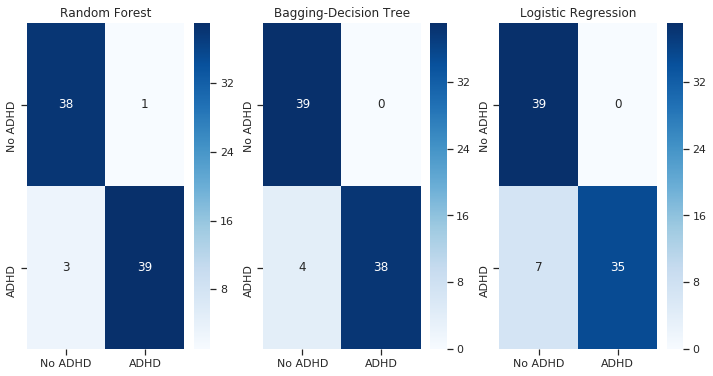

In [211]:
fit_model(x_bin_train, x_bin_test, y_bin_train, y_bin_test)

In [164]:
from imblearn.metrics import classification_report_imbalanced
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report_imbalanced(y_test, lr.predict(x_test)))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.83      1.00      0.81      0.91      0.90      0.82        39
        1.0       0.80      0.67      0.93      0.73      0.79      0.60        24
        3.0       0.79      0.61      0.95      0.69      0.76      0.56        18

avg / total       0.81      0.81      0.88      0.80      0.84      0.70        81



In [213]:
labs.head()

,Site,Handedness,Gender,Age,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,DX
0,5,0.83,1.0,7.29,40.0,41.0,41.0,112,103,109.0,0
1,5,0.57,1.0,8.29,60.0,56.0,48.0,115,125,123.0,3
3,5,0.50,0.0,8.04,86.0,82.0,85.0,109,120,116.0,1
4,5,0.21,0.0,12.44,42.0,43.0,44.0,117,126,124.0,0
5,5,0.73,1.0,12.79,64.0,52.0,70.0,109,134,129.0,1


In [215]:
labs_features.head()

,Age,ADHD Index,Inattentive,Hyper/Impulsive,DX
0,7.29,40.0,41.0,41.0,0
1,8.29,60.0,56.0,48.0,3
3,8.04,86.0,82.0,85.0,1
4,12.44,42.0,43.0,44.0,0
5,12.79,64.0,52.0,70.0,1


In [1]:
labs.to_excel("phenotypics.xlsx")

NameError: name 'labs' is not defined